In [ ]:
START
  |
  |-- Do you have labeled data?
        |
        |-- YES --> Supervised Learning
        |           |
        |           |-- What type of target?
        |                 |
        |                 |-- Numeric (Regression)
        |                 |     |
        |                 |     |-- Linear relationship? --> Linear Regression
        |                 |     |-- Complex or non-linear? --> Random Forest, XGBoost
        |                 |     |-- Small dataset? --> KNN, Ridge/Lasso
        |                 |
        |                 |-- Category (Classification)
        |                       |
        |                       |-- Few features, interpretable? --> Logistic Regression
        |                       |-- Complex patterns? --> SVM, Random Forest, XGBoost
        |                       |-- Small dataset? --> KNN, Naive Bayes
        |
        |-- NO --> Unsupervised Learning
                  |
                  |-- Goal?
                        |
                        |-- Grouping similar items? --> Clustering
                        |       |-- Spherical clusters? --> K-Means
                        |       |-- Arbitrary shapes? --> DBSCAN
                        |       |-- Hierarchical structure? --> Agglomerative Clustering
                        |
                        |-- Reduce feature dimensions? --> PCA, t-SNE, UMAP
                        |
                        |-- Find item relationships? --> Apriori, FP-Growth
  |
  |-- Are you training an agent with rewards?
        |
        |-- YES --> Reinforcement Learning
                    |
                    |-- Simple grid/world tasks? --> Q-Learning, SARSA
                    |-- Complex strategies? --> Value Iteration, Policy Iteration


KNN Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.62      0.50        16
           1       0.62      0.42      0.50        24

    accuracy                           0.50        40
   macro avg       0.52      0.52      0.50        40
weighted avg       0.54      0.50      0.50        40



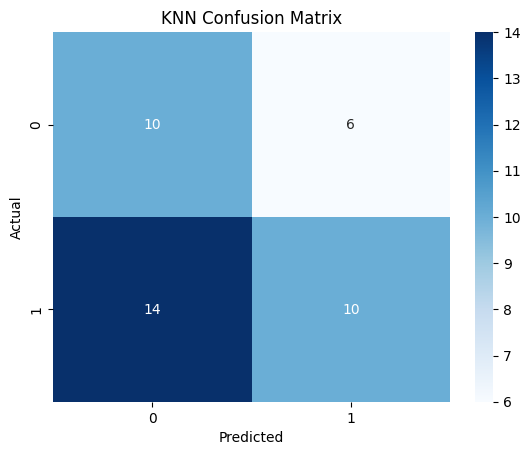

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('synthetic_heart_data.csv')

# Features and Target
X = df.drop('target', axis=1)
y = df['target']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Evaluation
print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Model Accuracy: 100.0 %

🌼 Enter flower details to predict its species:


Enter sepal length (cm):  6.9
Enter sepal width  (cm):  3.1
Enter petal length (cm):  5.3
Enter petal width  (cm):  2.2



🔍 Predicted Class (Target): 2
🌺 Predicted Flower Species: virginica


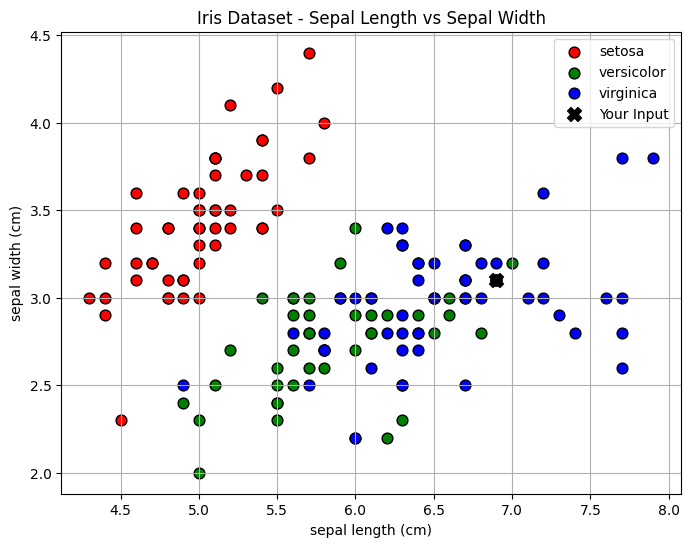

In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Model Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%\n")

# User input for prediction
print("🌼 Enter flower details to predict its species:")
sepal_length = float(input("Enter sepal length (cm): "))
sepal_width  = float(input("Enter sepal width  (cm): "))
petal_length = float(input("Enter petal length (cm): "))
petal_width  = float(input("Enter petal width  (cm): "))

sample = [[sepal_length, sepal_width, petal_length, petal_width]]
prediction = model.predict(sample)

print("\n🔍 Predicted Class (Target):", prediction[0])
print("🌺 Predicted Flower Species:", iris.target_names[prediction[0]])

# Scatter plot using first two features: sepal length vs sepal width
colors = ['red', 'green', 'blue']
plt.figure(figsize=(8, 6))

for i, color in enumerate(colors):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=target_names[i], color=color, edgecolor='k', s=60)

# Also plot the user input point
plt.scatter(sepal_length, sepal_width, color='black', marker='X', s=100, label='Your Input')

plt.title("Iris Dataset - Sepal Length vs Sepal Width")
plt.xlabel(feature_names[0])  # Sepal length
plt.ylabel(feature_names[1])  # Sepal width
plt.legend()
plt.grid(True)
plt.show()


Euclidean Distance between A and B: 5.66


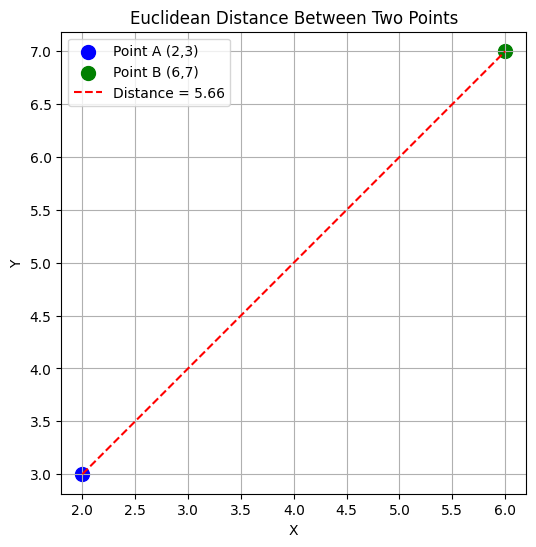

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Define two points
pointA = (2, 3)
pointB = (6, 7)

# Calculate Euclidean distance
distance = np.sqrt((pointB[0] - pointA[0])**2 + (pointB[1] - pointA[1])**2)
print("Euclidean Distance between A and B:", round(distance, 2))

# Scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(*pointA, color='blue', label='Point A (2,3)', s=100)
plt.scatter(*pointB, color='green', label='Point B (6,7)', s=100)

# Draw a line between the points
plt.plot([pointA[0], pointB[0]], [pointA[1], pointB[1]], color='red', linestyle='--', label=f'Distance = {round(distance, 2)}')

plt.title("Euclidean Distance Between Two Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()


   Age  EstimatedSalary  EducationLevel  Purchased
0   56            49426               2          0
1   46            37778               4          0
2   32            65241               3          1
3   60            62229               1          0
4   25           106652               2          0
Accuracy: 1.0
Confusion Matrix:
 [[242   0]
 [  0 158]]


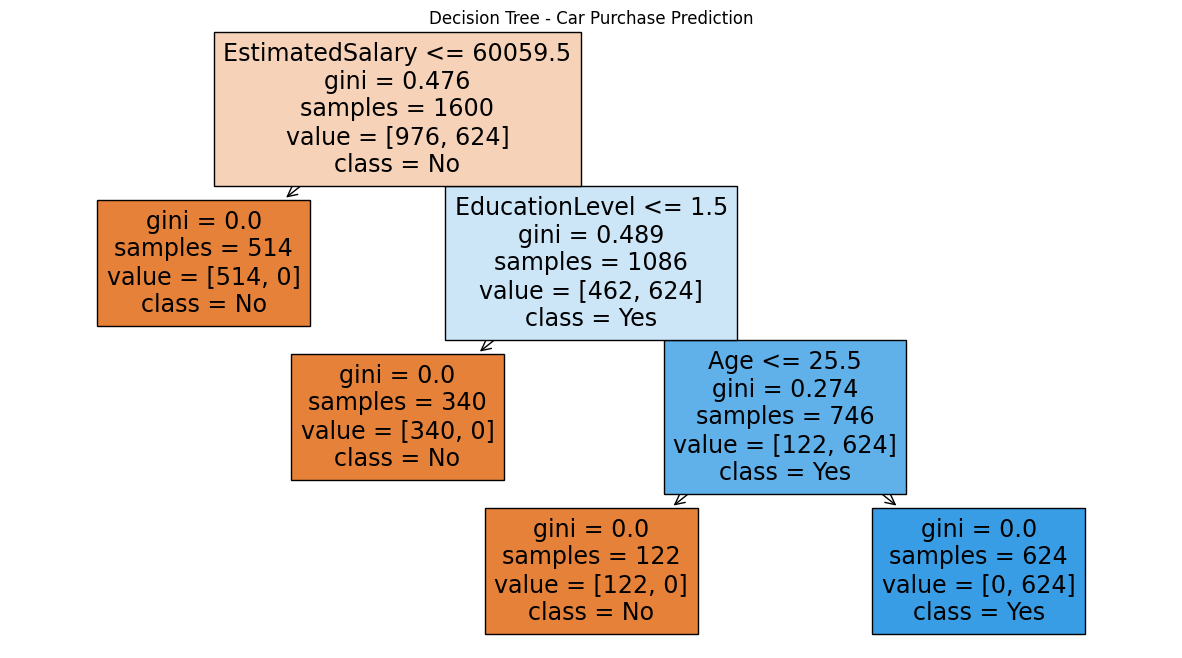

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("car_purchase_data.csv")
print(df.head())

# Features and target
X = df.drop("Purchased", axis=1)
y = df["Purchased"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot the decision tree
plt.figure(figsize=(15, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=["No", "Yes"])
plt.title("Decision Tree - Car Purchase Prediction")
plt.show()
